In [5]:
# generate_fake_data.py
import pandas as pd
import numpy as np
import os
import random

districts = ["Kadıköy", "Beşiktaş", "Şişli"]
categories = ["Burger", "Pizza", "Kebap", "Vegan", "Dessert"]
restaurants = []

for i in range(1, 150):
    district = random.choice(districts)
    category = random.choice(categories)
    name = f"{category}House {i}"
    restaurants.append({
        "name": name,
        "rating": round(random.uniform(3.5, 5.0), 2),
        "min_price": random.randint(20, 60),
        "delivery_time": f"{random.randint(20, 45)} dk",
        "District": district,
        "Category": category,
        "url": f"/{district.lower()}/{name.replace(' ', '-').lower()}"
    })

df_rest = pd.DataFrame(restaurants)
df_rest.to_csv("data/restaurants.csv", index=False)

# --- Menus ---
menus = []
for _, row in df_rest.iterrows():
    for j in range(random.randint(3, 6)):
        item_name = f"{row['Category']} Special {j+1}"
        menus.append({
            "restaurant": row["name"],
            "product": item_name,
            "desc": f"{item_name} description",
            "price": f"{random.randint(35, 100)}₺",
            "url": row["url"]
        })

df_menu = pd.DataFrame(menus)
df_menu.to_csv("data/menus.csv", index=False)

print("✅ Generated fake restaurants.csv and menus.csv")


✅ Generated fake restaurants.csv and menus.csv


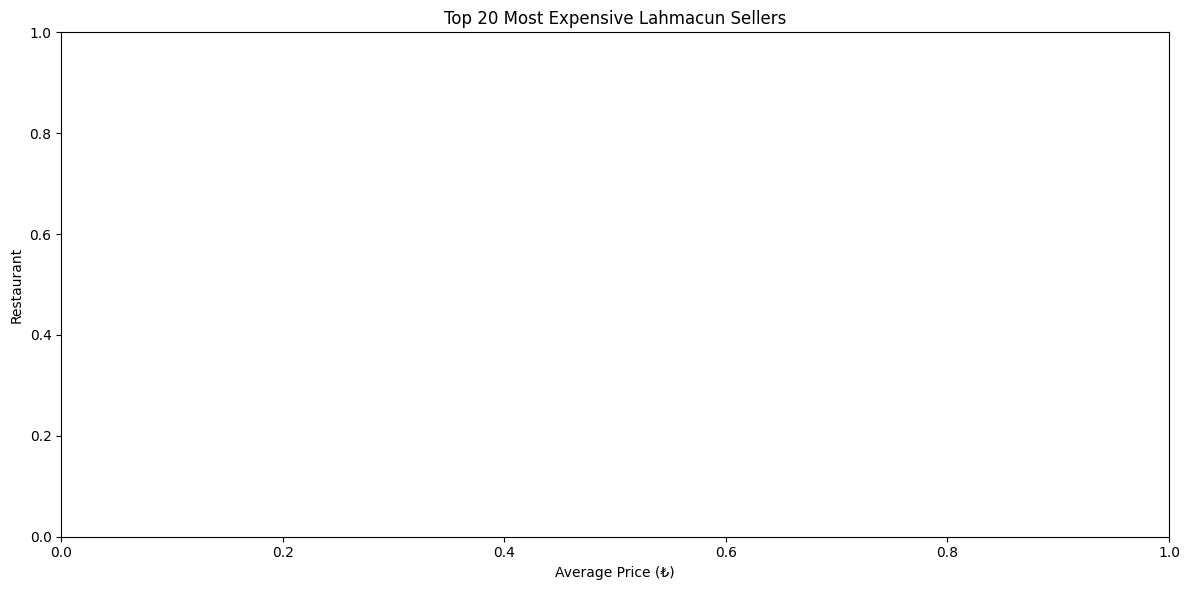

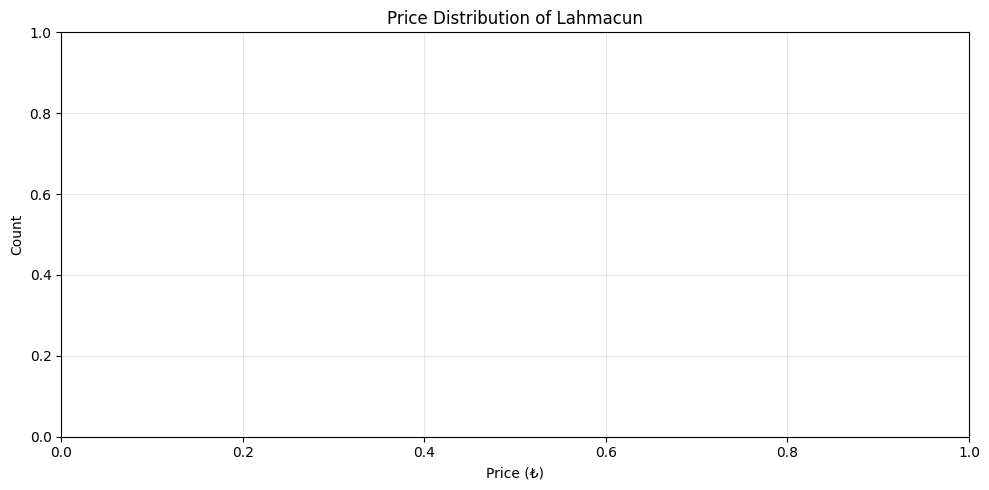

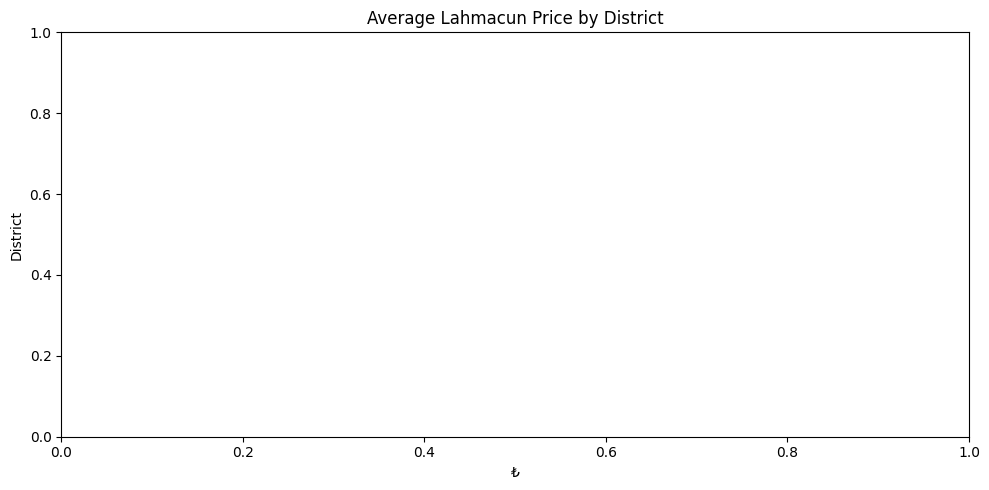

In [4]:
# ys_analysis.py – Jupyter-style analysis in script form

# 1. Load libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

restaurants = pd.read_csv("data/restaurants.csv")
menus = pd.read_csv("data/menus.csv")

# 2. Clean prices
menus["price_clean"] = menus["price"].str.extract(r"([\d,.]+)")
menus["price_clean"] = menus["price_clean"].str.replace(",", ".").astype(float)

# 3. Strip whitespace from product names
menus["product"] = menus["product"].str.strip()

# 4. Filter by product keyword (e.g., "Lahmacun")
product_name = "Lahmacun"
df_product = menus[menus["product"].str.contains(product_name, case=False, na=False)]

# 5. Compute average price per restaurant
rest_avg = df_product.groupby("restaurant")["price_clean"].mean().reset_index()
rest_avg.columns = ["restaurant", "avg_price"]

# 6. Merge with restaurant metadata
restaurants["name"] = restaurants["name"].str.strip()
avg_with_meta = pd.merge(rest_avg, restaurants, left_on="restaurant", right_on="name", how="left")

# 7. Sort and plot
plt.figure(figsize=(12, 6))
sorted_df = avg_with_meta.sort_values("avg_price", ascending=False).head(20)
sns.barplot(data=sorted_df, x="avg_price", y="restaurant", palette="viridis")
plt.title(f"Top 20 Most Expensive {product_name} Sellers")
plt.xlabel("Average Price (₺)")
plt.ylabel("Restaurant")
plt.tight_layout()
plt.show()

# 8. Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_product["price_clean"], bins=30, kde=True, color="#1f77b4")
plt.title(f"Price Distribution of {product_name}")
plt.xlabel("Price (₺)")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Optional: Group by district
if "District" in avg_with_meta.columns:
    by_district = avg_with_meta.groupby("District")["avg_price"].mean().sort_values()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=by_district.values, y=by_district.index, palette="coolwarm")
    plt.title(f"Average {product_name} Price by District")
    plt.xlabel("₺")
    plt.ylabel("District")
    plt.tight_layout()
    plt.show()
